# **Campus Placement Prediction**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the data

In [2]:
df = pd.read_csv("./DataSets/Placement_Data_Full_Class.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Understanding the Data

In [3]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [4]:
df.shape

(215, 15)

In [5]:
df.size

3225

In [6]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [10]:
df.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [11]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

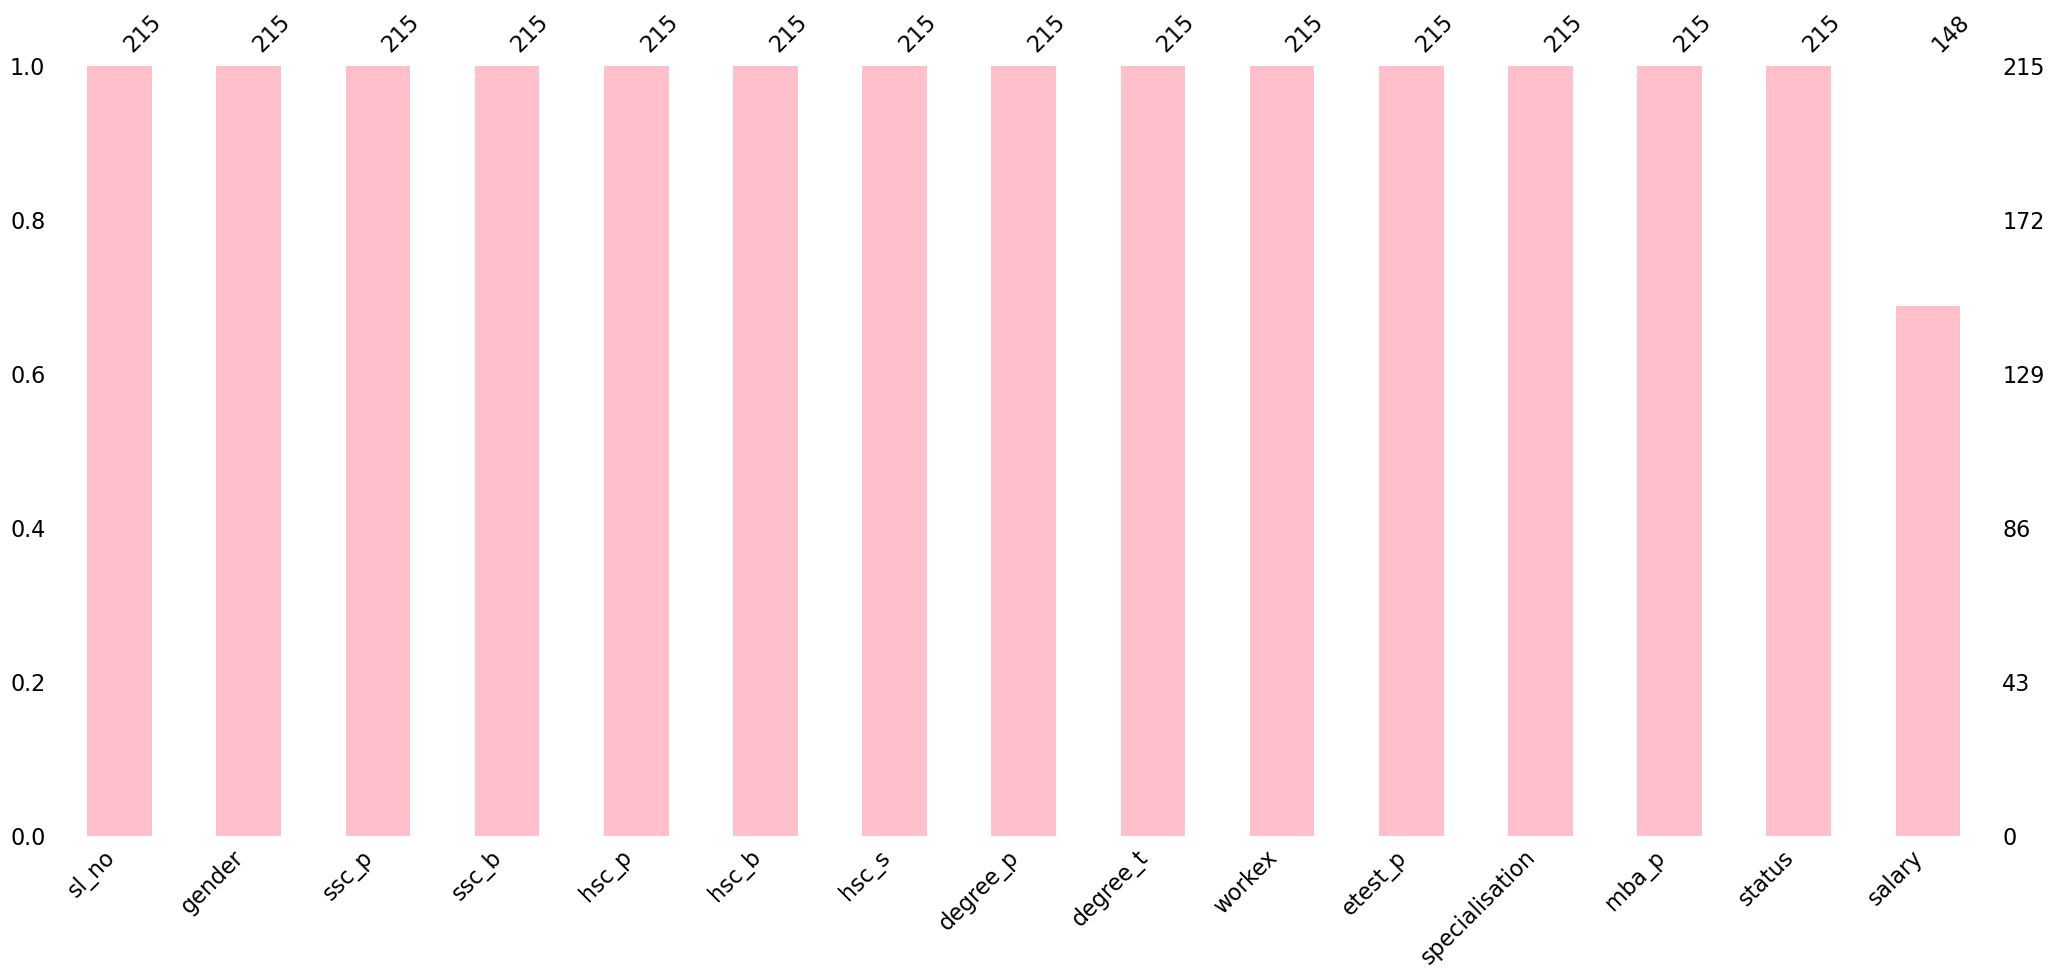

In [12]:
import missingno as no
no.bar(df, color='pink')

<AxesSubplot:>

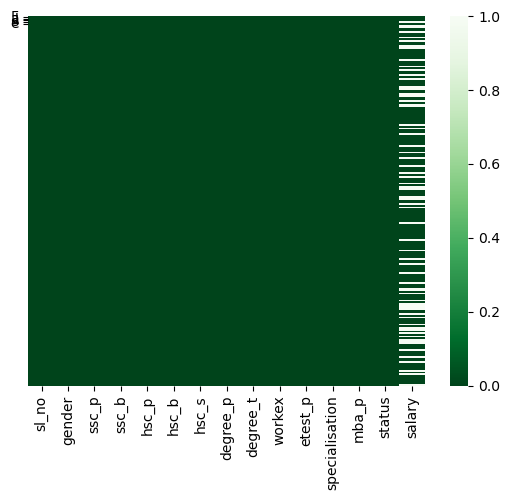

In [13]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='Greens_r')

In [14]:
df = df.fillna(0)
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


<AxesSubplot:>

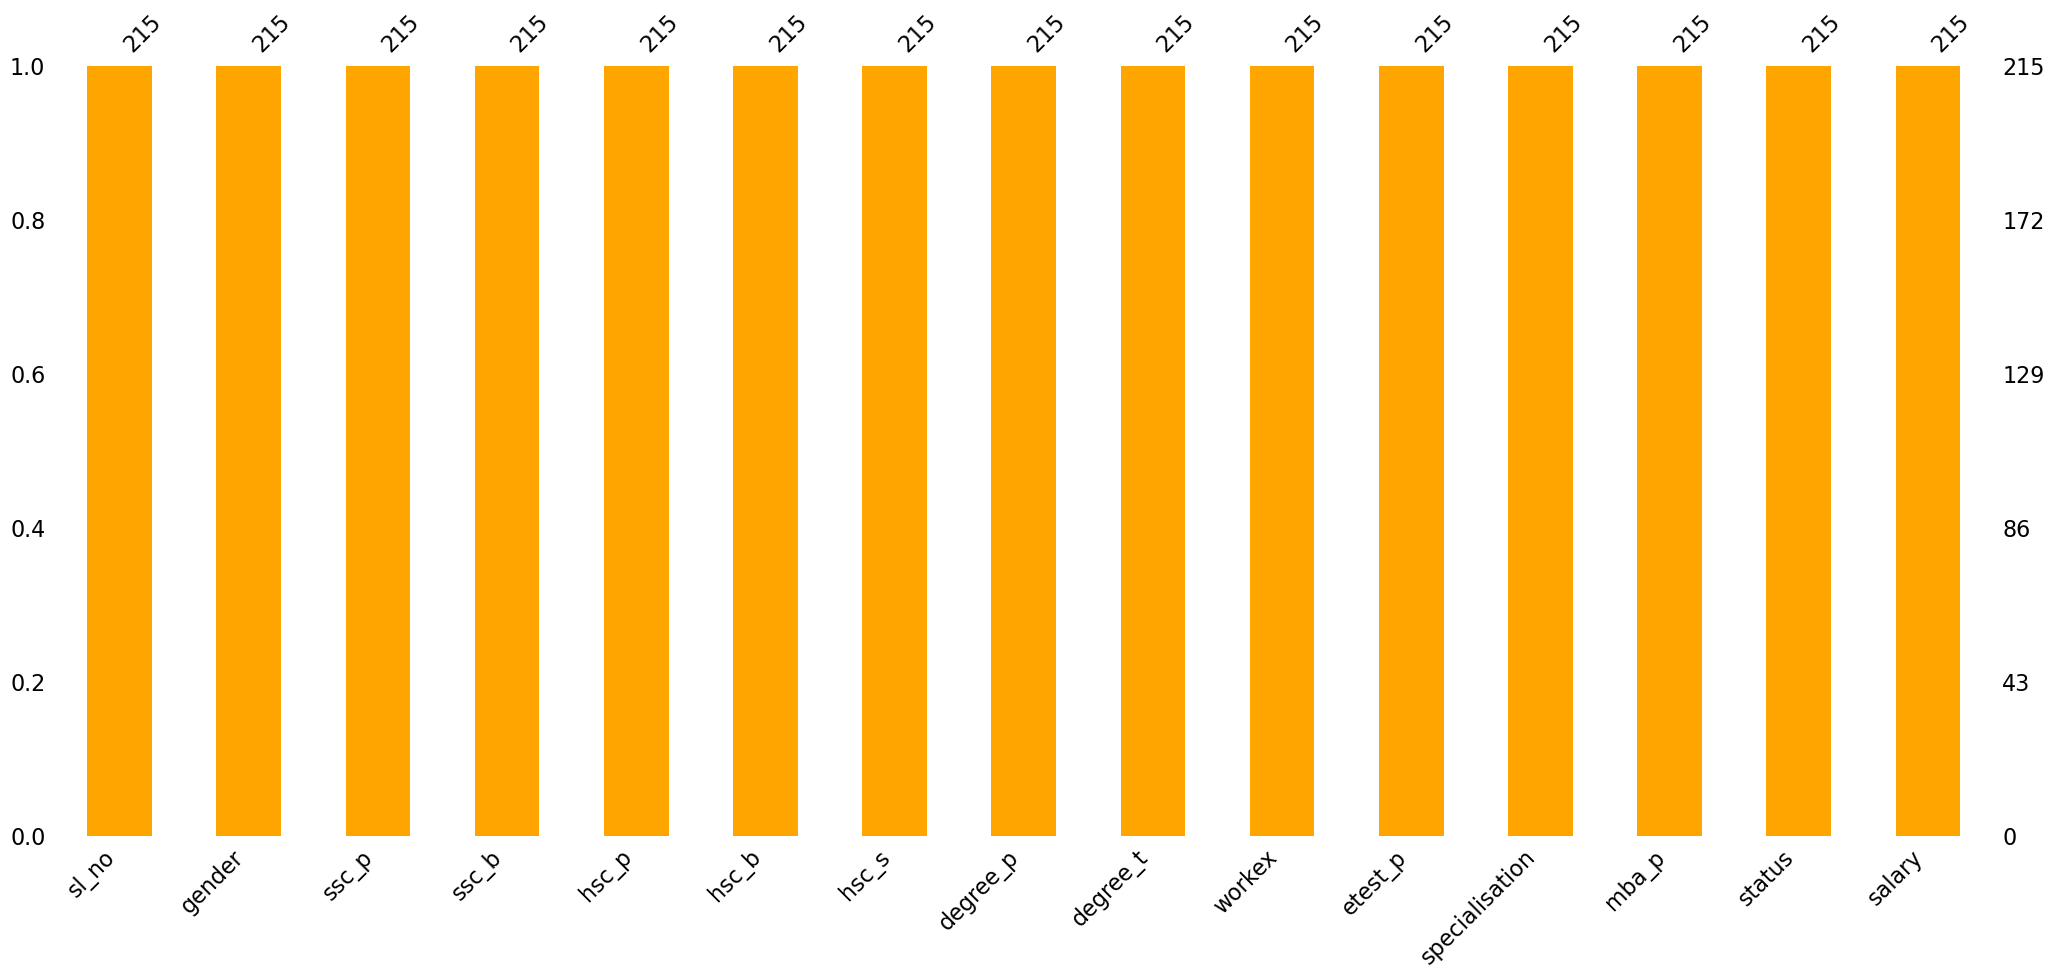

In [15]:
import missingno as no
no.bar(df, color='orange')

<Figure size 1400x800 with 0 Axes>

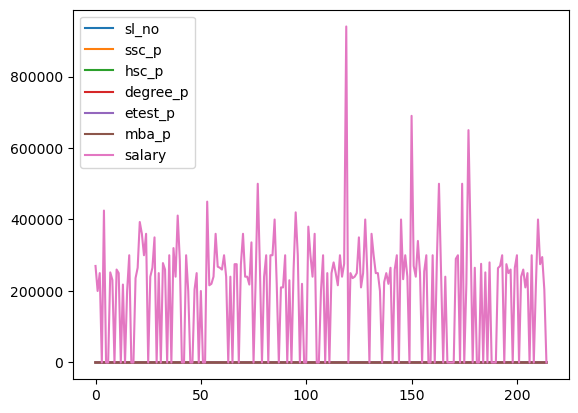

In [16]:
plt.figure(figsize=(14,8))
df.plot()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


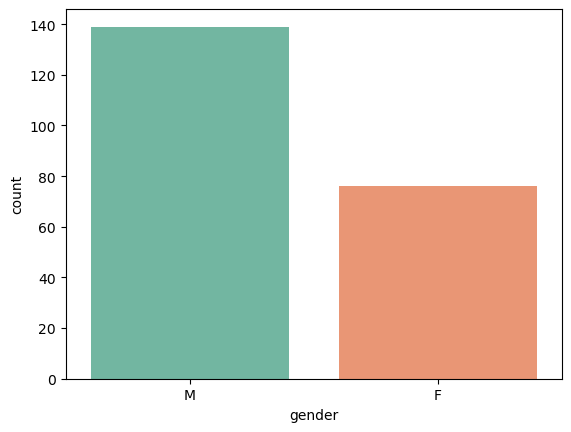

In [17]:
sns.countplot(df.gender, palette='Set2')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


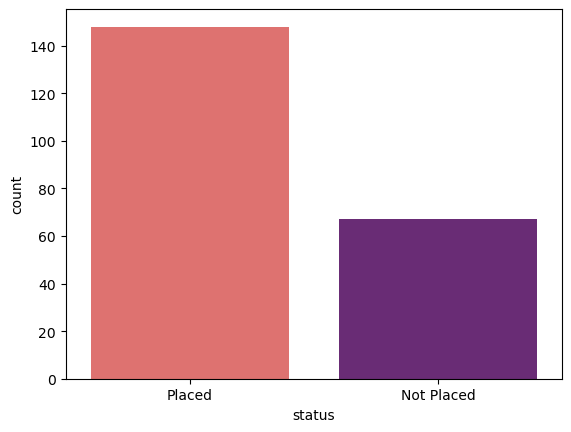

In [18]:
sns.countplot(df.status, palette='magma_r')
plt.show()

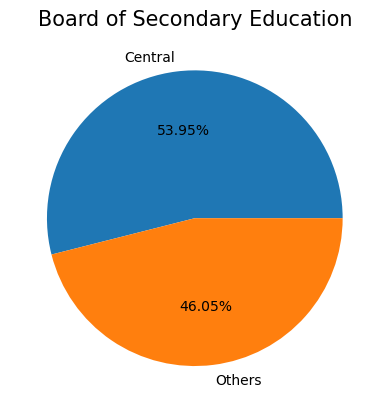

In [19]:
df1 = df['ssc_b'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('Board of Secondary Education', fontsize=15)
plt.show()

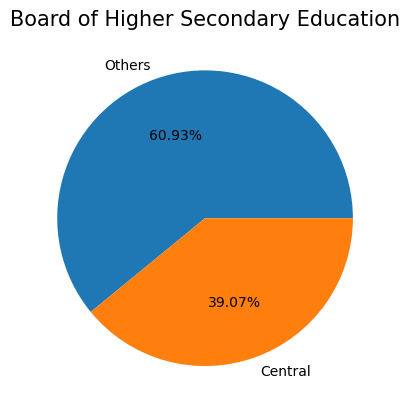

In [20]:
df2 = df['hsc_b'].value_counts()
plt.pie(df2.values, labels=df2.index, autopct='%0.2f%%')
plt.title('Board of Higher Secondary Education', fontsize=15)
plt.show()

<AxesSubplot:xlabel='degree_t', ylabel='degree_p'>

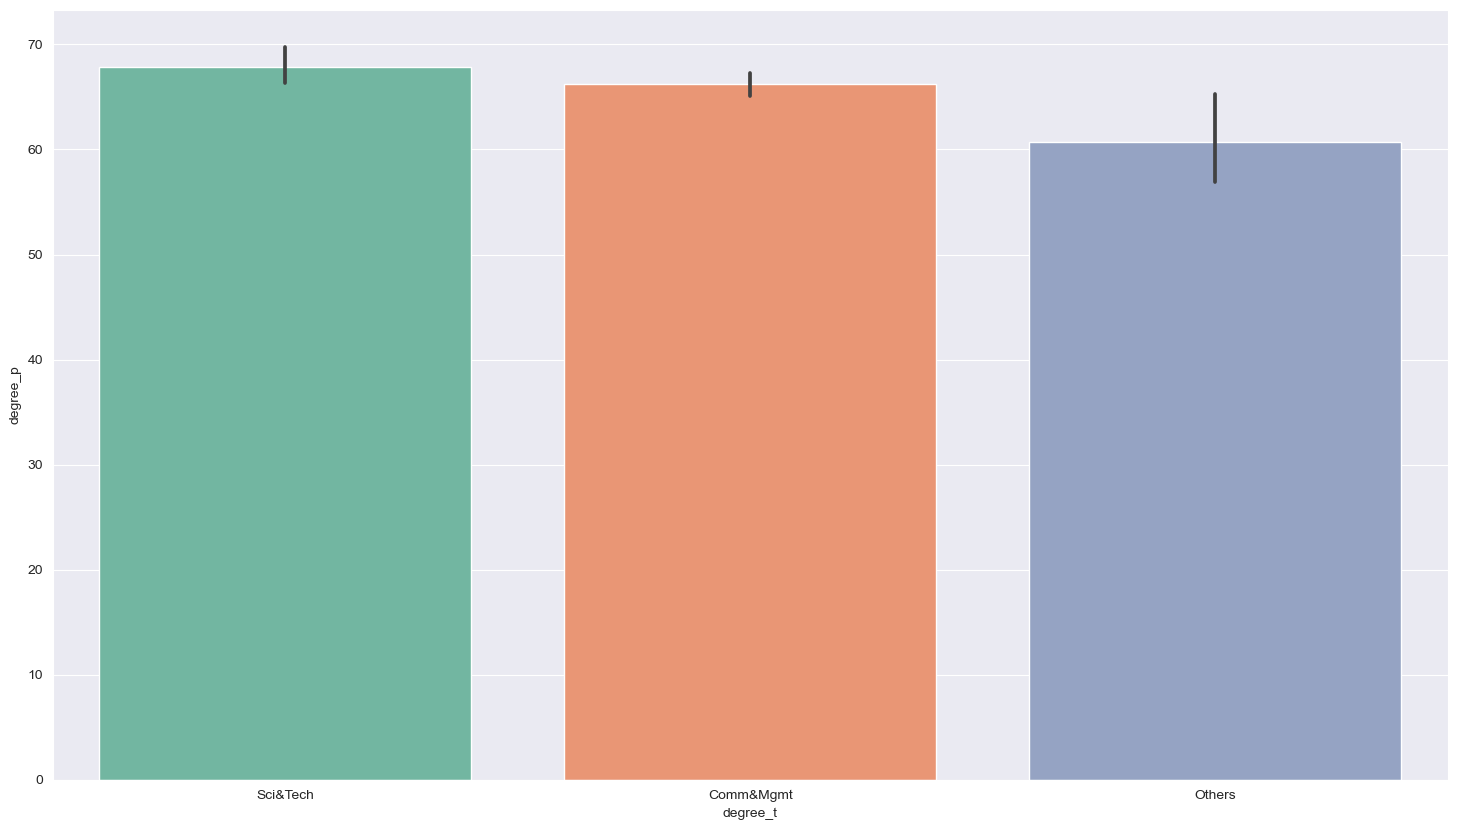

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,10))
sns.barplot(x='degree_t',y='degree_p', data=df, palette='Set2')

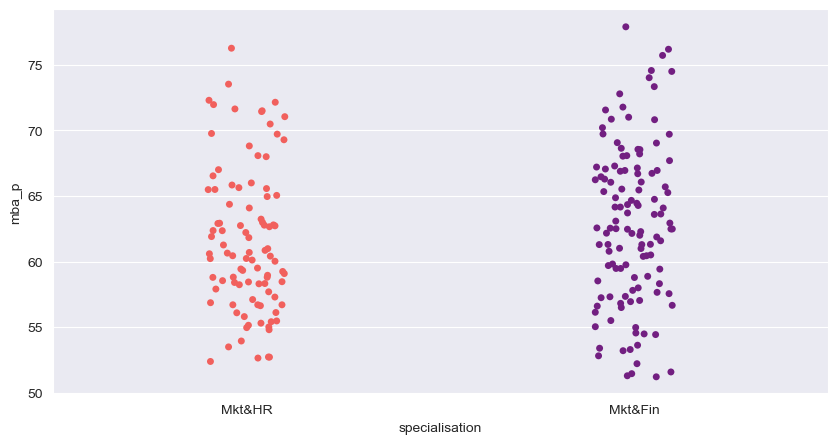

In [22]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df.specialisation, y=df.mba_p, palette='magma_r')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


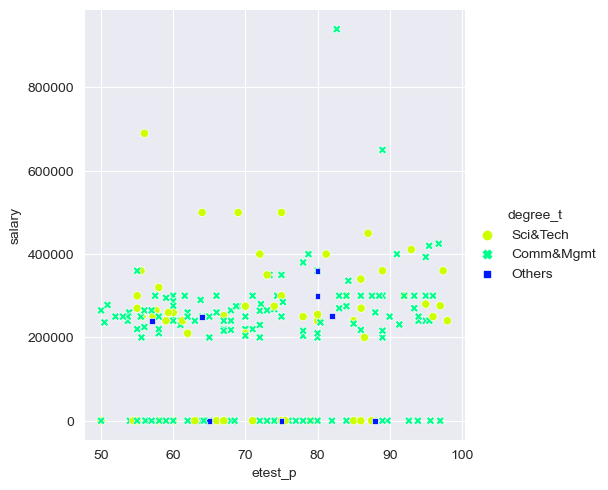

In [23]:
sns.relplot("etest_p","salary",data=df,hue="degree_t",style="degree_t", palette='gist_rainbow')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


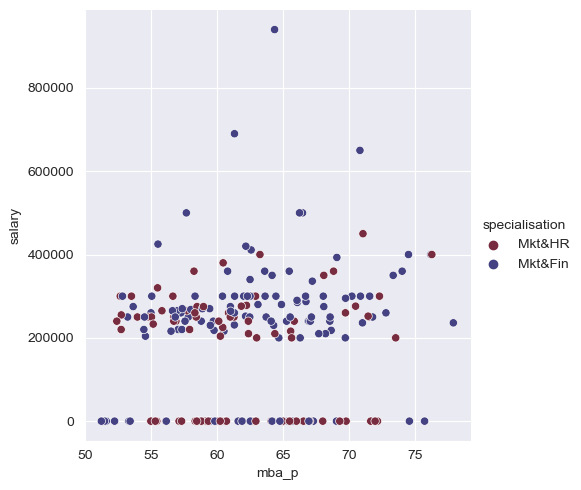

In [24]:
sns.relplot("mba_p","salary",data=df,hue="specialisation", palette="icefire_r")

<AxesSubplot:xlabel='gender', ylabel='salary'>

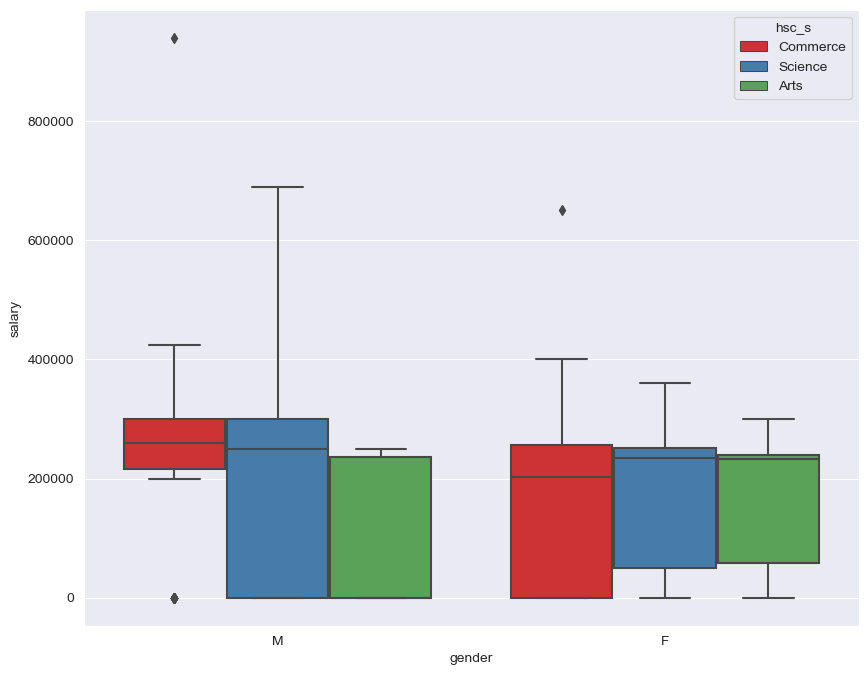

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(x='gender', y='salary', hue='hsc_s', data=df, palette='Set1')

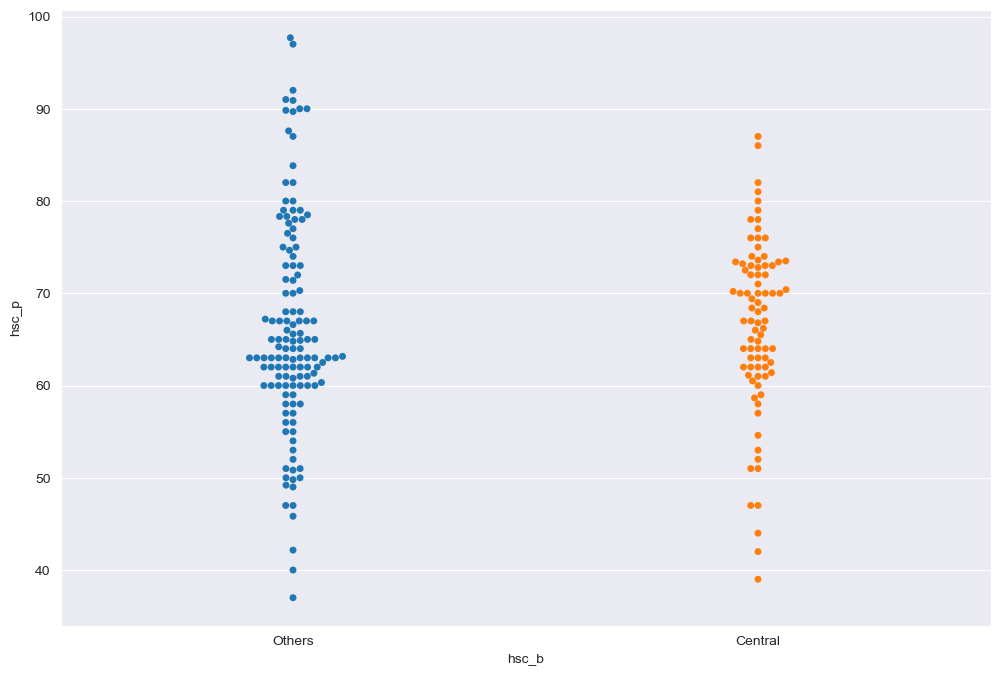

In [26]:
plt.figure(figsize=(12,8))
sns.swarmplot(x="hsc_b" , y = "hsc_p" ,data=df)
plt.show()

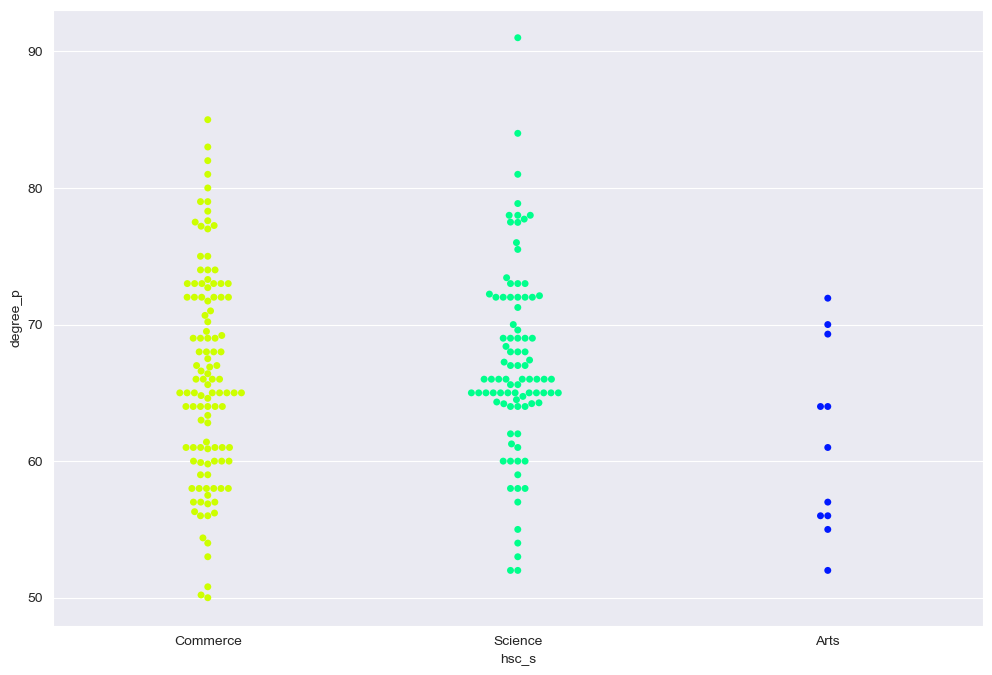

In [27]:
plt.figure(figsize=(12,8))
sns.swarmplot(x="hsc_s" , y = "degree_p" ,data=df, palette='gist_rainbow')
plt.show()

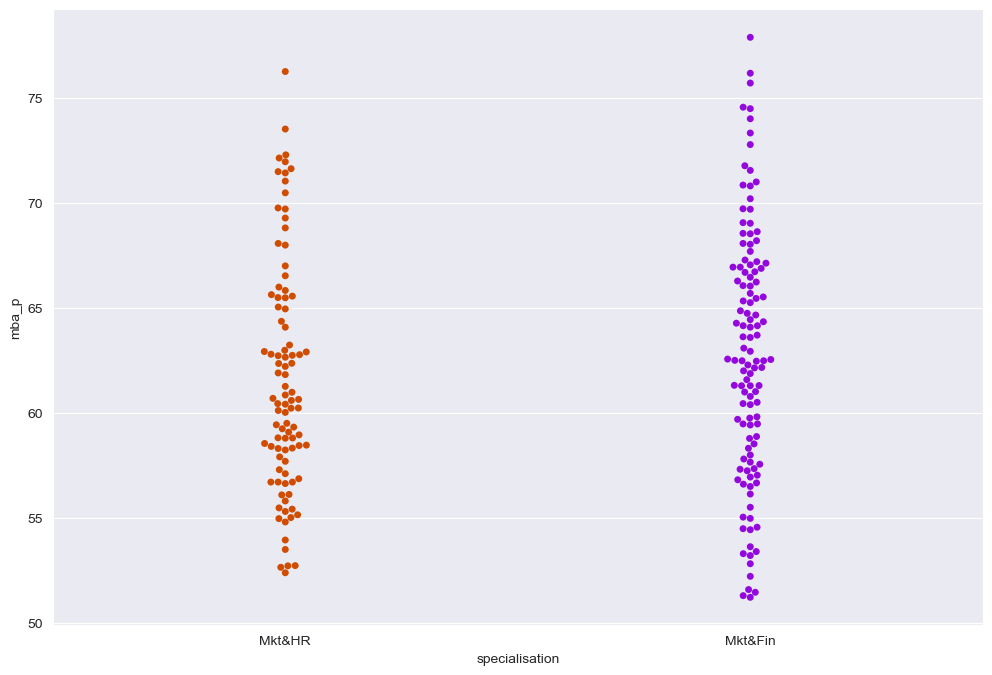

In [28]:
plt.figure(figsize=(12,8))
sns.swarmplot(x="specialisation" , y = "mba_p" ,data=df, palette='gnuplot_r')
plt.show()

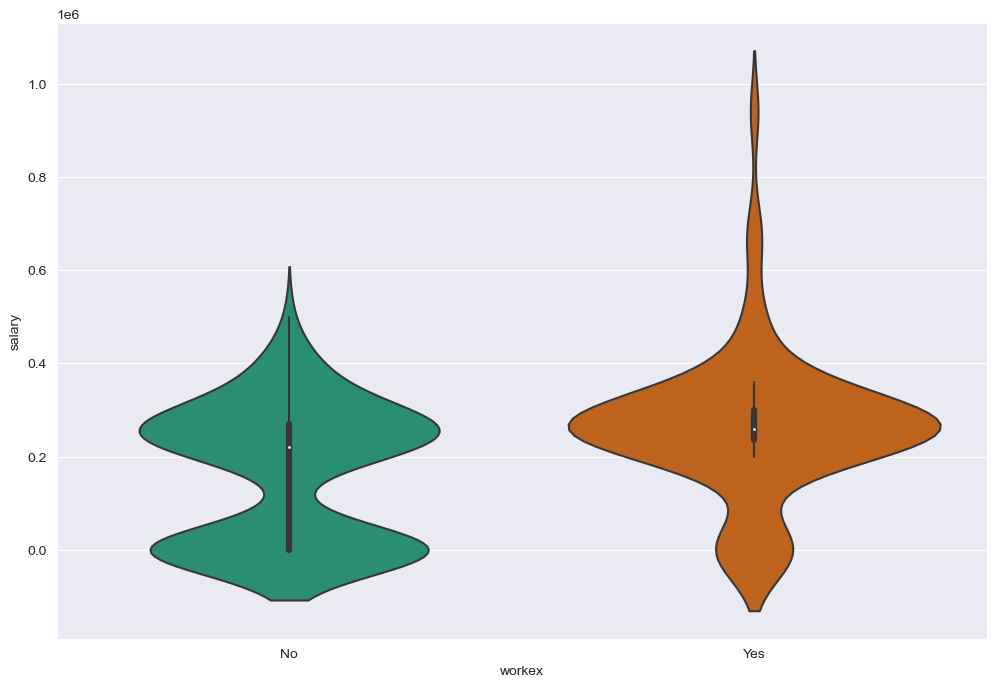

In [29]:
plt.figure(figsize=(12,8))
sns.violinplot(x=df.workex, y=df.salary, palette='Dark2')
plt.show()

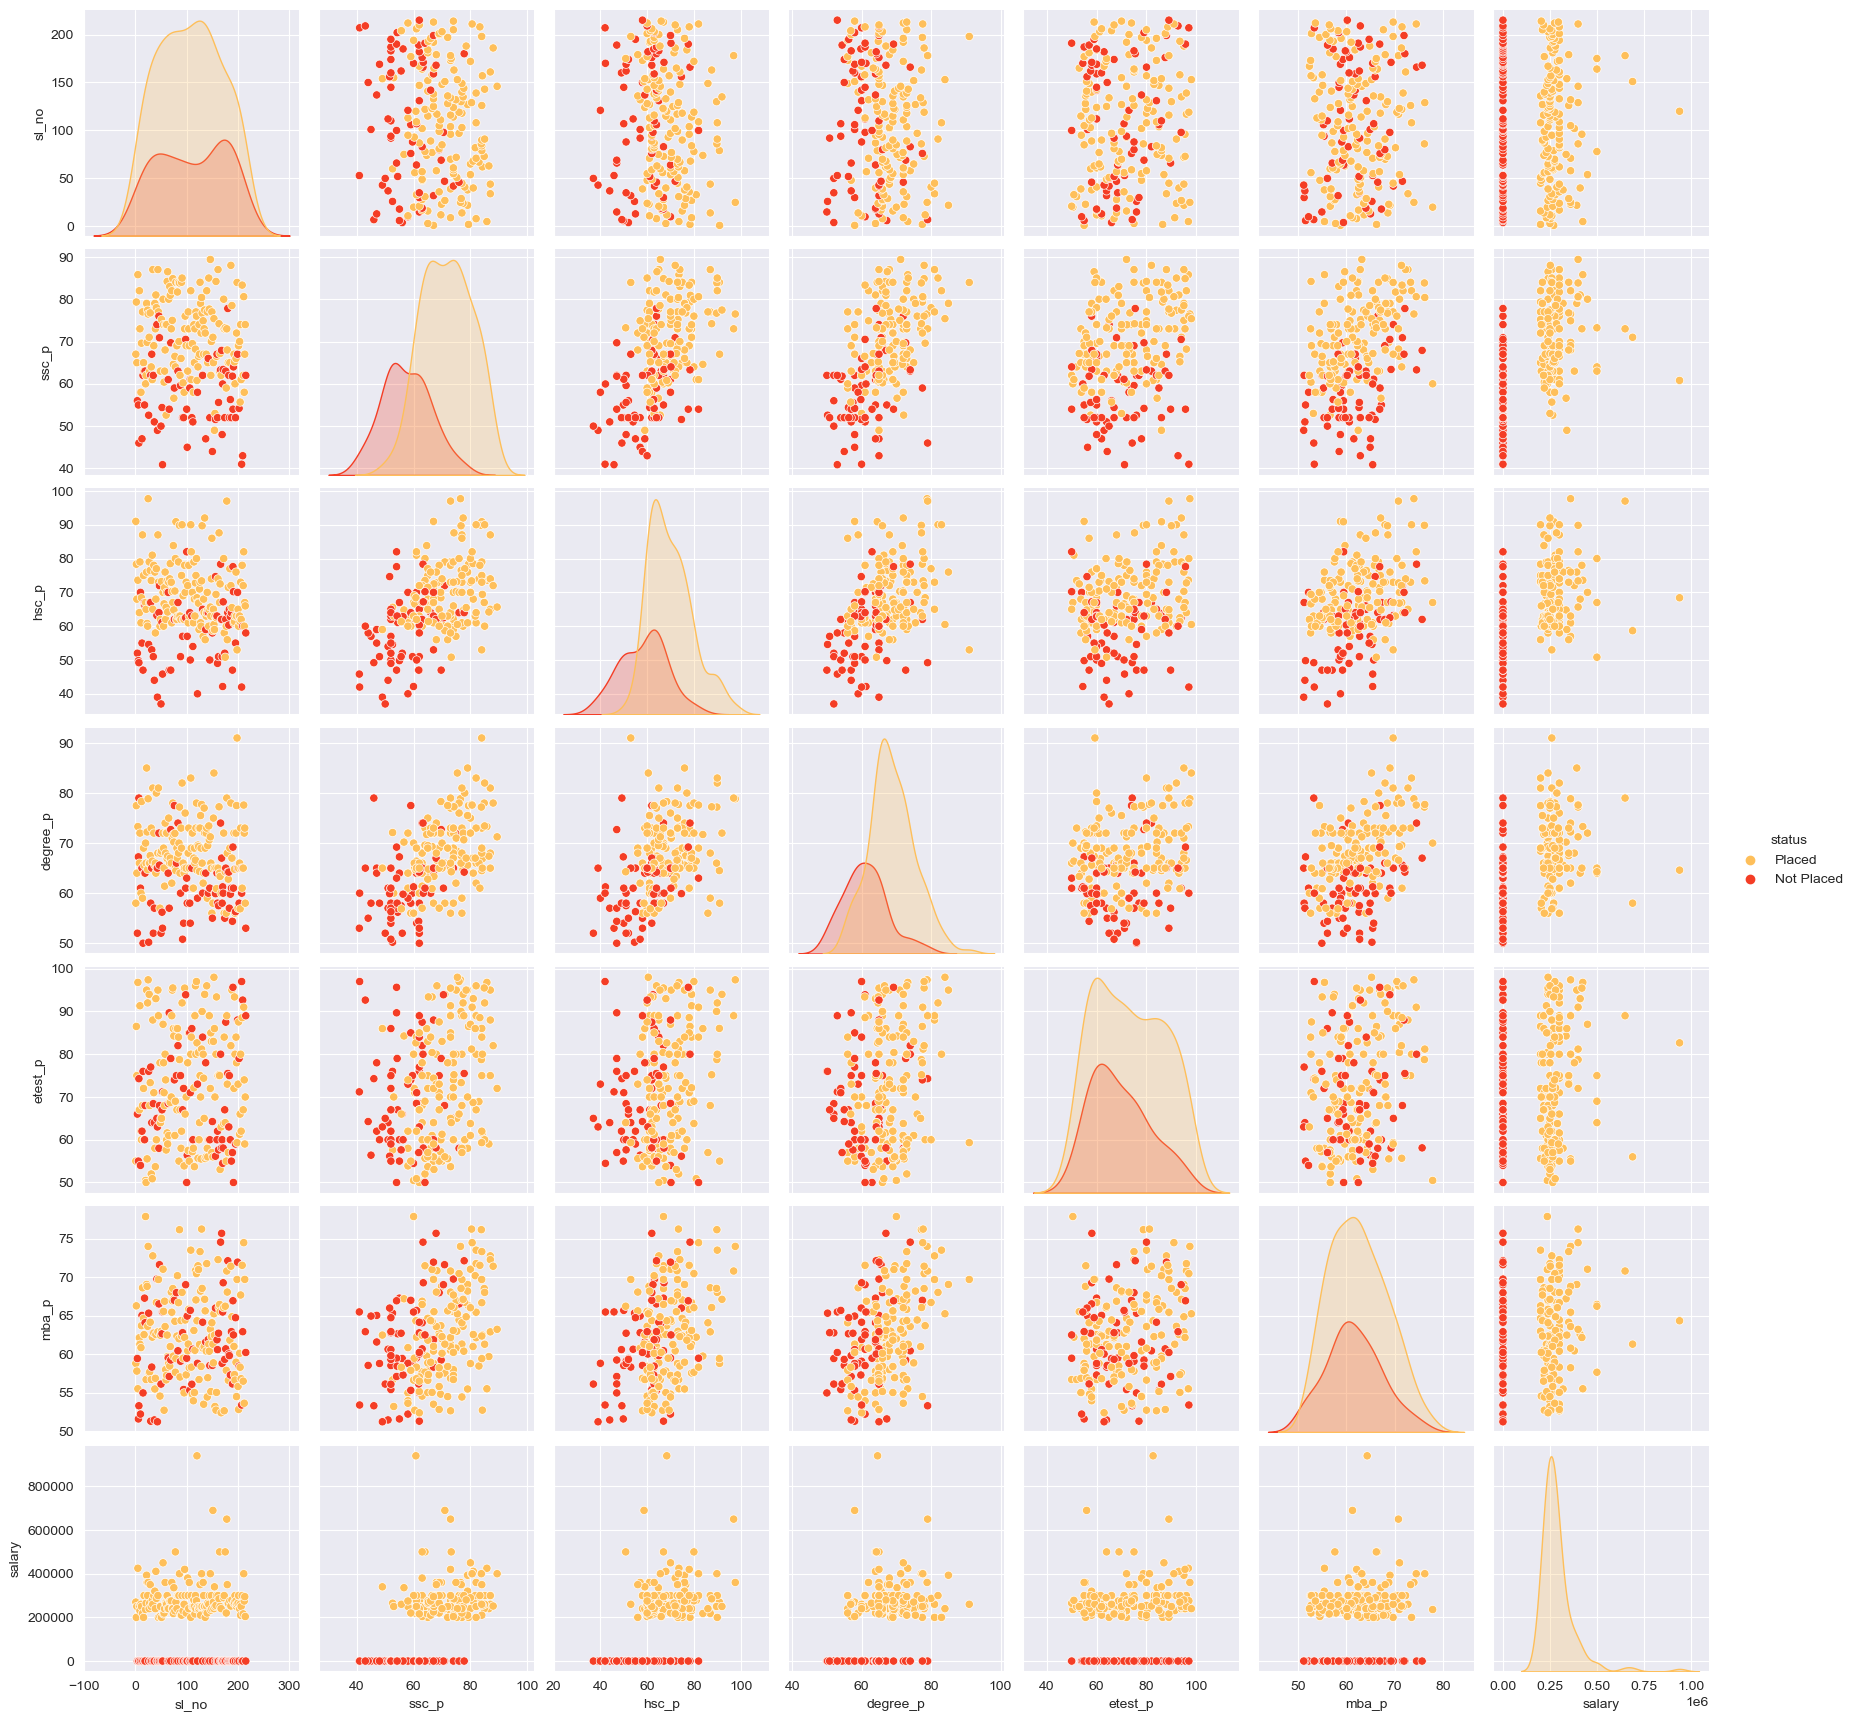

In [30]:
sns.pairplot(df, hue = 'status', palette='YlOrRd')
plt.show()

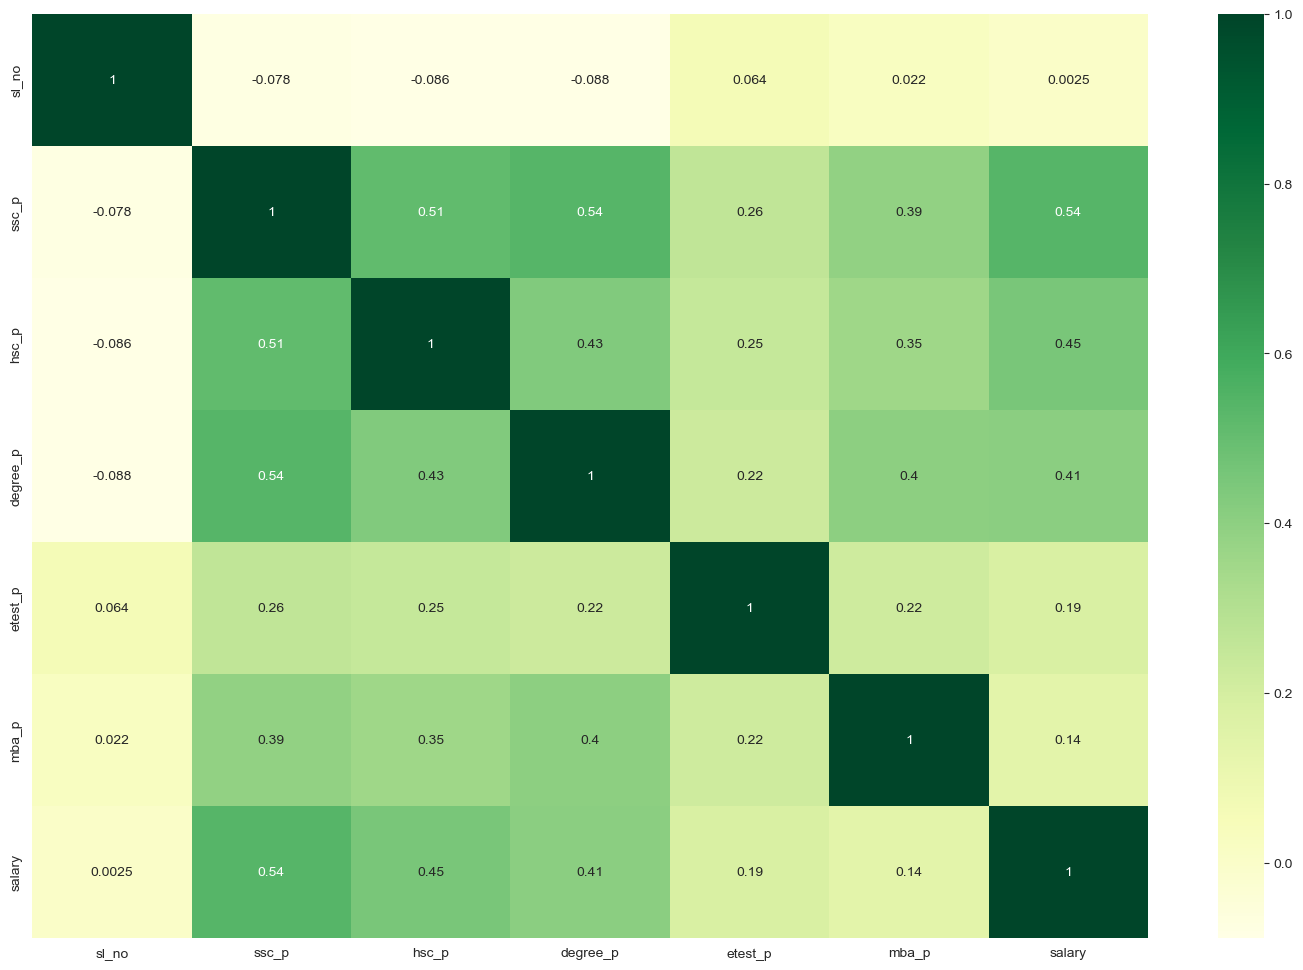

In [31]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='YlGn')
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoding = LabelEncoder()
category = ['gender','ssc_b',	'hsc_b',	'hsc_s',	'degree_t',	'workex',	'specialisation', 'status']
df[category] = df[category].apply(lambda x:labelencoding.fit_transform(x))
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

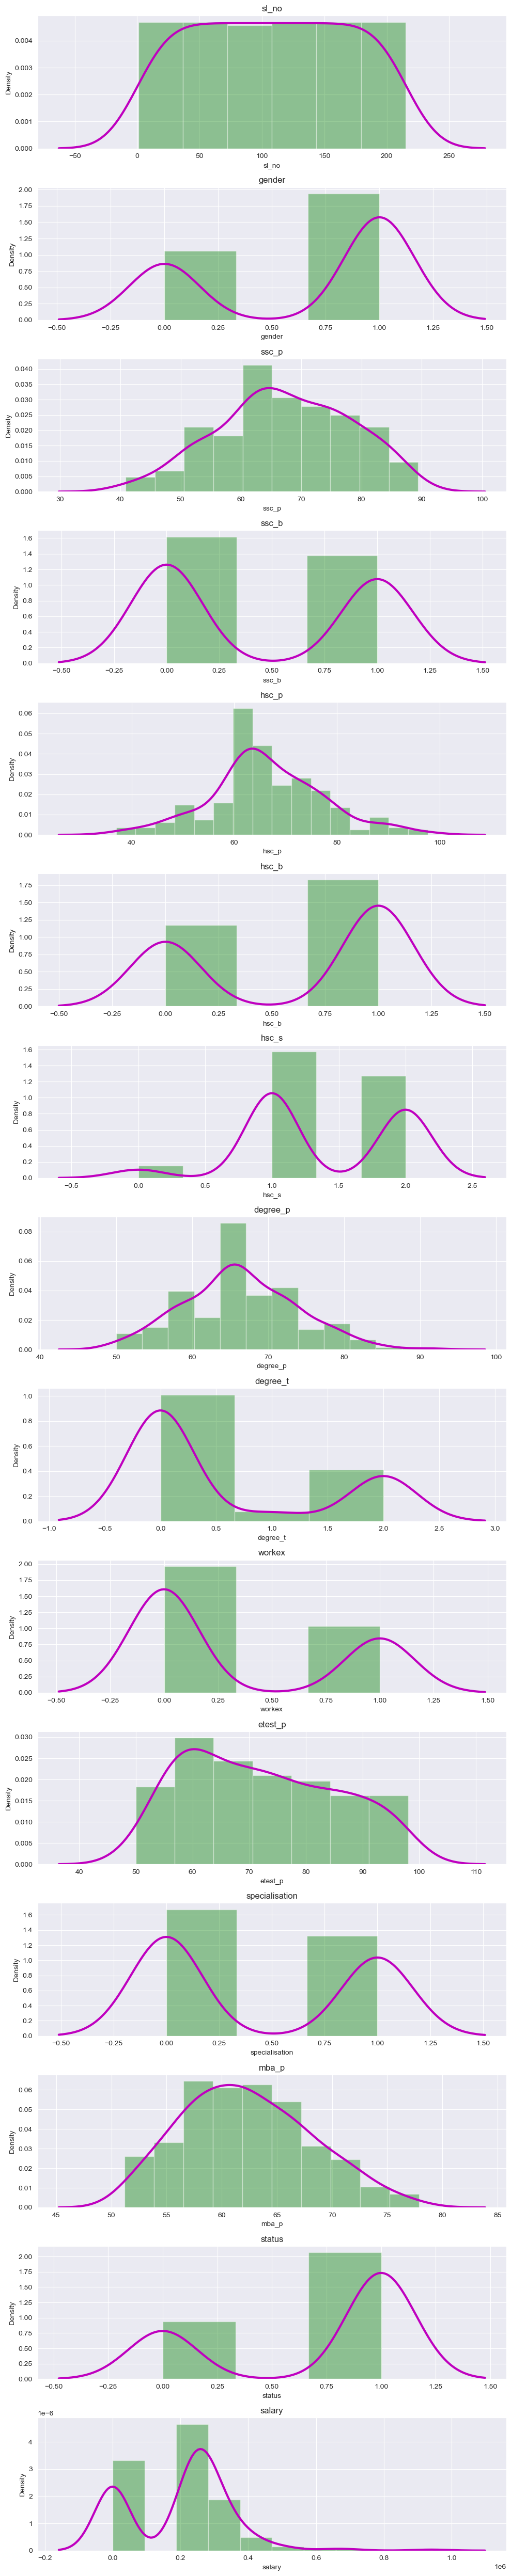

In [33]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(15, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "m", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])
  
plt.tight_layout()

# Splitting the Data into Dependent and Independent Variables

In [34]:
x = df.drop(['sl_no', 'status', 'salary'], axis=1)
y = df.status

# Feature Importance

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.03771855 0.23519817 0.03372573 0.1511627  0.03023257 0.03846357
 0.16872579 0.03330394 0.055772   0.07596671 0.04557328 0.09415698]


<AxesSubplot:>

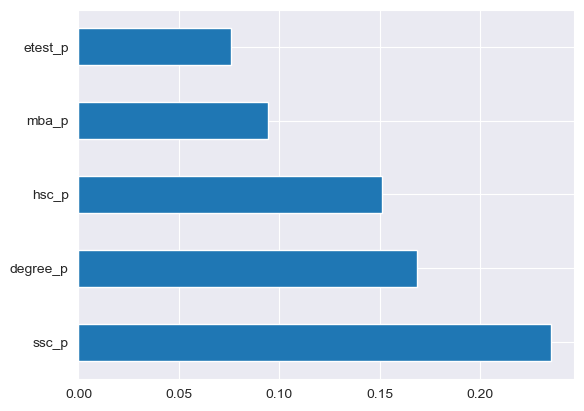

In [36]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(5).plot(kind='barh')

# Training and Testing the Data

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=5)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Logistic Regression

In [39]:
lm = LogisticRegression()
lm.fit(xtrain, ytrain)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Prediction

In [40]:
ypred_train = lm.predict(xtrain)
ypred_test = lm.predict(xtest)

## Confusion Matrix

In [41]:
cm = confusion_matrix(ytest, ypred_test)
cm

array([[16,  1],
       [ 1, 25]], dtype=int64)

<AxesSubplot:>

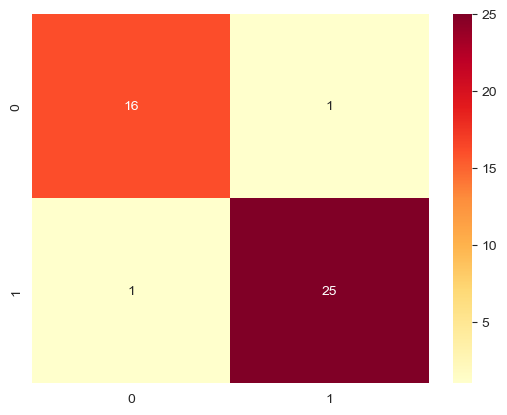

In [42]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')

## Accuracy

In [43]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 86.04651162790698
Accuracy of testing data: 95.34883720930233


## Classification Report

In [44]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.96      0.96      0.96        26

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43



# Decission Tree

In [45]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

## Prediction

In [46]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

## Confusion Matrix

In [47]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[15,  4],
       [ 2, 22]], dtype=int64)

<AxesSubplot:>

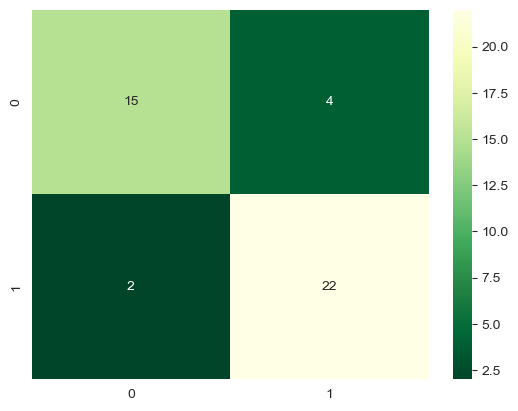

In [48]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn_r" ,fmt='g')

## Accuracy

In [49]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 100.0
Accuracy of testing data: 86.04651162790698


## Classification Report

In [50]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.92      0.85      0.88        26

    accuracy                           0.86        43
   macro avg       0.85      0.86      0.86        43
weighted avg       0.87      0.86      0.86        43



# K Nearest Neighbour

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

## Prediction

In [52]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

## Confusion Matrix

In [53]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[14,  1],
       [ 3, 25]], dtype=int64)

<AxesSubplot:>

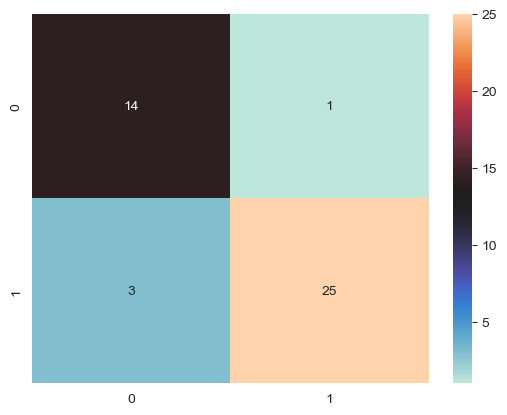

In [54]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="icefire" ,fmt='g')

## Accuracy

In [55]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 86.62790697674419
Accuracy of testing data: 90.69767441860465


## Classification Report

In [56]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.89      0.96      0.93        26

    accuracy                           0.91        43
   macro avg       0.91      0.89      0.90        43
weighted avg       0.91      0.91      0.91        43



# Random Forest

In [57]:
rf = RandomForestClassifier(max_depth=3)
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=3)

## Prediction

In [58]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

## Confusion Matrix

In [59]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[13,  2],
       [ 4, 24]], dtype=int64)

<AxesSubplot:>

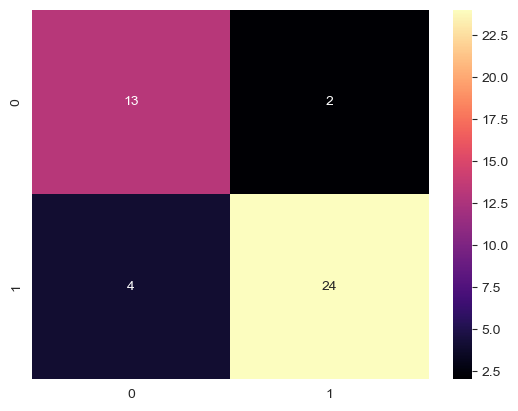

In [60]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="magma" ,fmt='g')

## Accuracy

In [61]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 88.95348837209302
Accuracy of testing data: 86.04651162790698


## Classification Report

In [62]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.86      0.92      0.89        26

    accuracy                           0.86        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.86      0.86      0.86        43



# Comparing Accuracy

In [63]:
accuracy =  {ac1: 'Logistic Regression', ac2:'Decission Tree', ac3:'KNN', ac4: 'Random Forest'}

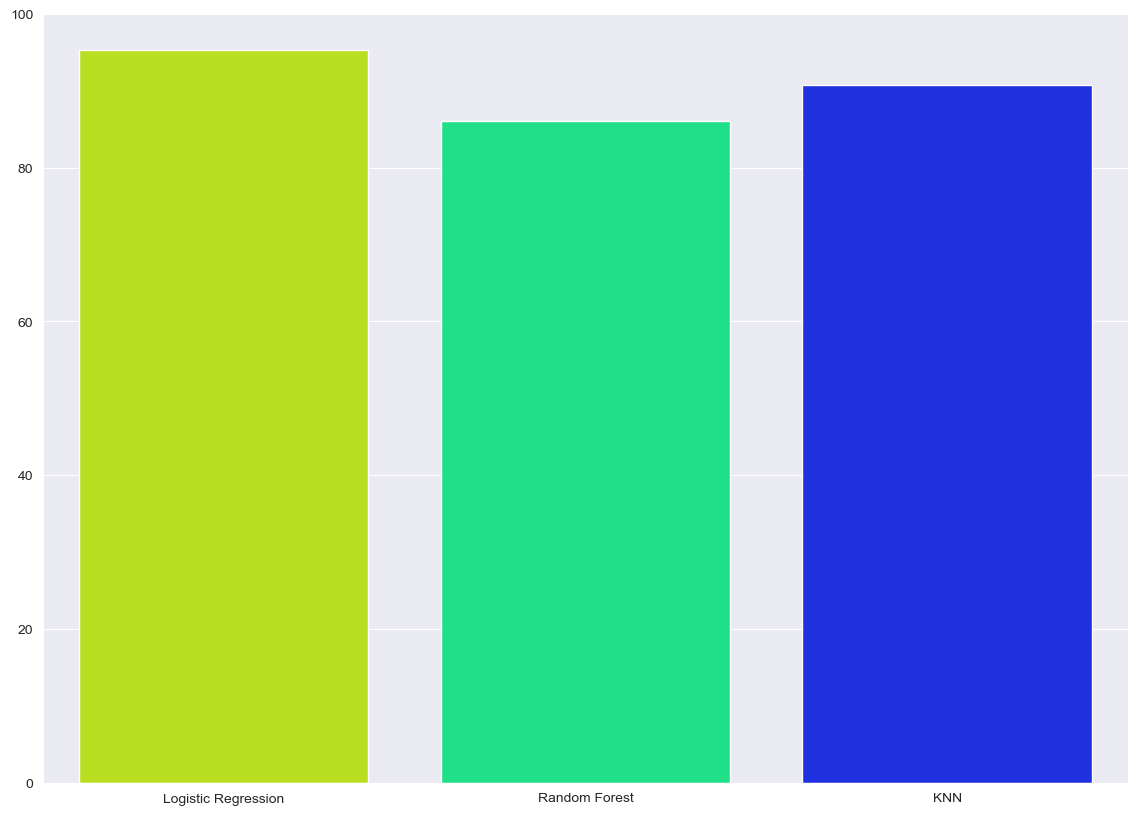

In [64]:
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

As accuracy of Logistic Regression algorithm is more ie. 95.34%

Hence we will save the model.

# Saving the Model

In [65]:
import pickle
pickle.dump(lm, open('model.pkl', 'wb'))

# Sample Prediction

In [66]:
p = lm.predict([[1, 67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80]])
print("Status = ", p)

Status =  [1]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
